# Higher Dimensionality Visualizations

Scatter plots are effective in communicating data by mapping a feature to spatial dimensions, which we understand intuitively. However, you and I are limited in that we lose the ability to easily and passively comprehend an image past three spatial dimensions. It takes a great deal of thought and even more creativity to push the envelope any further. You can introduce a time dimension using animations, but it really doesn't get much better than that.

Real world datasets often have tens of features, if not more. Sparse datasets can have tens of thousands of features. What are your visualization options if when you have a dataset with more than three dimensions?

## Parallel Coordinates


Parallel coordinate plots are similar to scatter plots in that each axis maps to the ordered, numeric domain of a feature. But instead of having axes aligned in an orthogonal manner, parallel coordinates get their name due to their axes being arranged vertically and in parallel. All that is just a fancy way of saying parallel coordinates are a bunch of parallel, labeled, numeric axes.

Each graphed observation is plotted as a polyline, a series of connected line segments. The joints of the polyline fall on each axis. Since each axis maps to the domain of a numeric feature, the resulting polyline fully describes the value of each of the observation's features.

Parallel coordinates are a useful charting technique you'll want to add the exploring section of your course map. They are a higher dimensionality visualization technique because they allow you to easily view observations with more than three dimensions simply by tacking on additional parallel coordinates. However at some point, it becomes hard to comprehend the chart anymore due to the sheer number of axes and also potentially due to the number of observations. If you data has more than 10 features, parallel coordinates might not do it for you.

**Parallel coordinates are useful because polylines belonging to similar records tend to cluster together.** To graph them with Pandas and MatPlotLib, you have to specify a feature to group by (it can be non-numeric). This results in each distinct value of that feature being assigned a unique color when charted. Here's an example of parallel coordinates using SciKit-Learn's Iris dataset:

In [3]:
from sklearn.datasets import load_iris
from pandas.tools.plotting import parallel_coordinates

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  del sys.path[0]


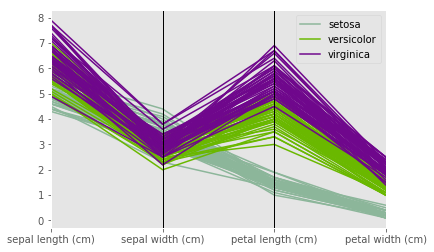

In [4]:
# Look pretty...
matplotlib.style.use('ggplot')
# If the above line throws an error, use plt.style.use('ggplot') instead

# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 

df['target_names'] = [data.target_names[i] for i in data.target]

# Parallel Coordinates Start Here:
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

## Andrew's Curves

An Andrews plot, also known as Andrews curve, helps you visualize higher dimensionality, multivariate data by plotting each of your dataset's observations as a curve. **The feature values of the observation act as the coefficients of the curve, so observations with similar characteristics tend to group closer to each other.** Due to this, Andrews curves have some use in outlier detection.

Just as with Parallel Coordinates, every plotted feature must be numeric since the curve equation is essentially the product of the observation's features vector (transposed) and the vector: (1/sqrt(2), sin(t), cos(t), sin(2t), cos(2t), sin(3t), cos(3t), ...) to create a Fourier series.

The Pandas implementation requires you once again specify a GroupBy feature, which is then used to color code the curves as well as produce as chart legend:

In [5]:
from pandas.tools.plotting import andrews_curves

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  import sys


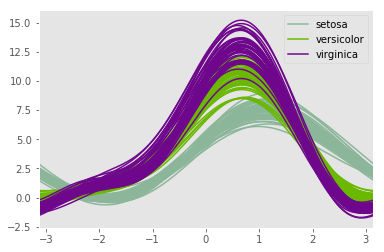

In [6]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target_names'] = [data.target_names[i] for i in data.target]

# Andrews Curves Start Here:
plt.figure()
andrews_curves(df, 'target_names')
plt.show()

One of the current weaknesses with the Pandas implementation (and this goes for Parallel Coordinates as well) is that every single observation is charted. In the MATLAB version, you can specify a quantile or probability distribution cutoff. This way, only the mean feature values for a specific group are plotted, with a transparent boundary around the cutoffs. 


## imshow

One last higher dimensionality, visualization-technique you should know how to use is MatPlotLib's .imshow() method. This command generates an image based off of the normalized values stored in a matrix, or rectangular array of float64s. The properties of the generated image will depend on the dimensions and contents of the array passed in:

- An [X, Y] shaped array will result in a grayscale image being generated
- A [X, Y, 3] shaped array results in a full-color image: 1 channel for red, 1 for green, and 1 for blue
- A [X, Y, 4] shaped array results in a full-color image as before with an extra channel for alpha


Besides being a straightforward way to display .PNG and other images, the .imshow() method has quite a few other use cases. **When you use the .corr() method on your dataset, Pandas calculates a correlation matrix for you that measures how close to being linear the relationship between any two features in your dataset are.** Correlation values may range from -1 to 1, where 1 would mean the two features are perfectly positively correlated and have identical slopes for all values. -1 would mean they are perfectly negatively correlated, and have a negative slope for one another, again being linear. Values closer to 0 mean there is little to no linear relationship between the two variables at all (e.g., pizza sales and plant growth), and so the further away from 0 the value is, the stronger the relationship between the features:

In [13]:
%matplotlib inline
import numpy as np

In [14]:
df = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.corr()

,a,b,c,d,e
a,1.000000e+00,-0.002116,-5.267155e-07,0.025956,-0.041169
b,-2.115590e-03,1.000000,7.563325e-02,0.050197,0.030800
c,-5.267155e-07,0.075633,1.000000e+00,0.025120,-0.000687
d,2.595614e-02,0.050197,2.511968e-02,1.000000,0.028224
e,-4.116859e-02,0.030800,-6.865657e-04,0.028224,1.000000


The matrix is symmetric because the correlation between any two features X and Y is, of course, identical to that of features Y and X. It is invariant to scale, so even if one feature is measured in inches and the other is in centimeters, it makes no difference. This matrix and others like the covariance matrix, are useful for inspecting how the variance of a feature is explained by the variance in other feature, and verifying how much new information each feature provides. But even looking at this little, 5x5 matrix makes me dizzy, so you can imagine how easy it is to get lost in a higher dimensionality dataset. You can circumvent this by visualizing your correlation matrix by plotting it with .imshow():

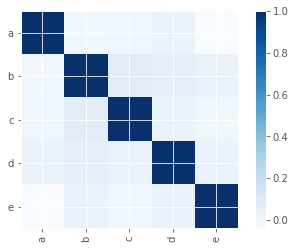

In [15]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

plt.show()

.imshow() can help you any time you have a square matrix you want to visualize. Other matrices you might want to visualize include the covariance matrix, the confusion matrix, and in the future once you learn how to use certain machine learning algorithms that generate clusters which live in your feature-space, you'll also be able to use .imshow() to peek into the brain of your algorithms as they run, so long as your features represent a rectangular image!

## Testing imshow()

In [16]:
from scipy import misc

In [18]:
img = misc.imread('cat.jpg')
img.shape

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(3000, 4000, 3)

In [19]:
img

array([[[ 49,  31,  31],
        [ 49,  31,  31],
        [ 48,  30,  30],
        ...,
        [ 15,  13,  14],
        [ 14,  12,  13],
        [ 11,   9,  10]],

       [[ 46,  28,  28],
        [ 48,  30,  30],
        [ 48,  30,  30],
        ...,
        [ 14,  12,  13],
        [ 14,  12,  13],
        [ 11,   9,  10]],

       [[ 48,  30,  30],
        [ 49,  31,  31],
        [ 47,  29,  29],
        ...,
        [ 13,  11,  12],
        [ 13,  11,  12],
        [ 11,   9,  10]],

       ...,

       [[ 78,  79,  83],
        [ 78,  79,  83],
        [ 80,  81,  85],
        ...,
        [109, 109, 109],
        [118, 118, 118],
        [117, 117, 117]],

       [[ 77,  78,  82],
        [ 78,  79,  83],
        [ 80,  81,  85],
        ...,
        [110, 110, 110],
        [119, 119, 119],
        [116, 116, 116]],

       [[ 80,  81,  85],
        [ 80,  81,  85],
        [ 80,  81,  85],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [116, 116, 116]]

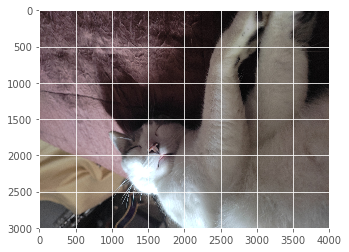

In [20]:
plt.imshow(img)

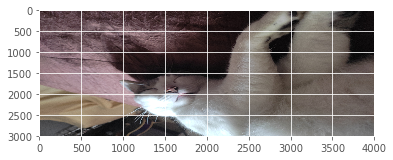

In [21]:
plt.imshow(img, aspect=0.5)